# GÖREV1

In [2]:
# import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#pip install -U seaborn
#! pip install --upgrade matplotlib
#!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option("display.float_format", lambda x: "%.3f" %x)

In [4]:
#Görev 1: KEŞİFÇİ VERİ ANALİZİ
df_ = pd.read_csv("C:/Users/esman/PycharmProjects/feature_engineering/datasets/diabetes.csv")
df = df_.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [5]:
#adım1: Veriye genel bakış
def check_df(dataframe, head=5):
    print("################# SHAPE ####################")
    print(dataframe.shape)
    print("################# TYPES ####################")
    print(dataframe.dtypes)
    print("################# HEAD ####################")
    print(dataframe.head(head))
    print("################# TAİL ####################")
    print(dataframe.tail(head))
    print("################# NA ####################")
    print(dataframe.isnull().sum())
    print("################# QUANTİLES ####################")
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)
check_df(df)


################# SHAPE ####################
(768, 9)
################# TYPES ####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
################# HEAD ####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100          

In [6]:
#Adım2: Değişkenleri Yakalama
#cat_th<10 --> cat_cols
#car_th>20 --> car_th
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]               #önce kategorik değişkenler seçilir

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and    #numerik ama kategorikler seçilir.
                   dataframe[col].dtypes != "O"]

    # eğer bir kategorik değişkeni 20 den büyükse aynı zamanda tipi de kategorikse bu değişken kategorik değildir. kategorik gibi duruyorsun ama kardinel. yani ölçülebilirliği yok. eşsiz çok fazla sınıfın var.
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [7]:
#kategorik değişken analizi
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

   Outcome  Ratio
0      500 65.104
1      268 34.896
##########################################


count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


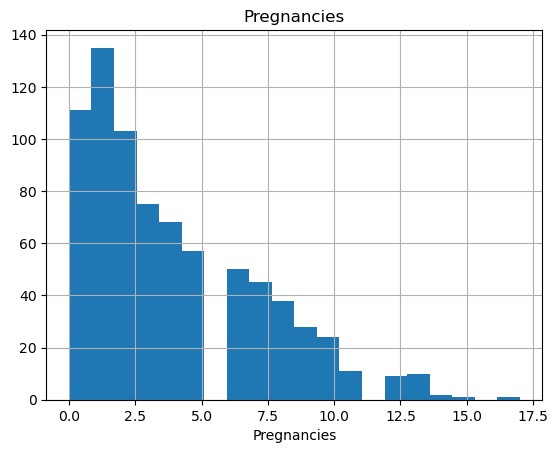

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


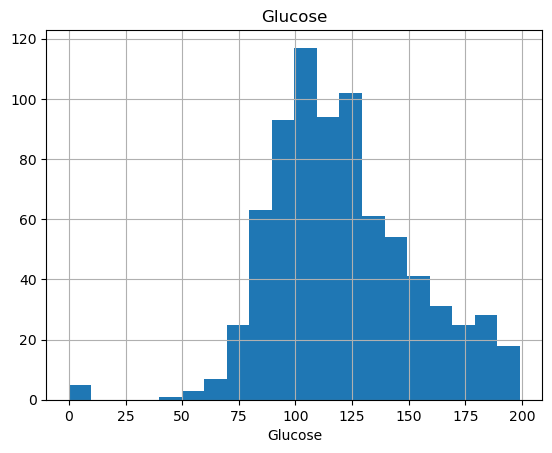

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


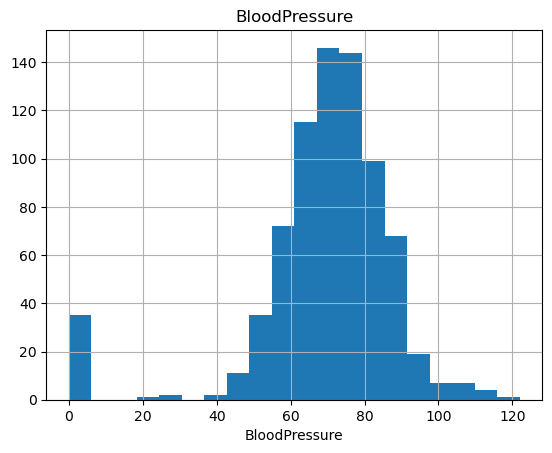

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


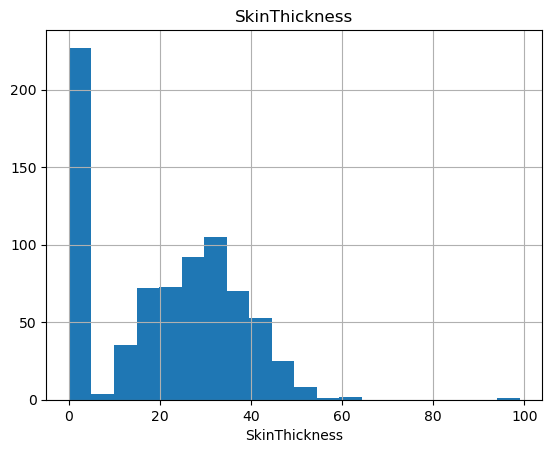

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


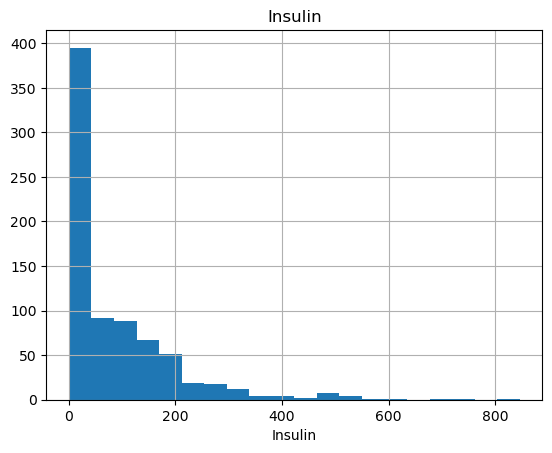

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


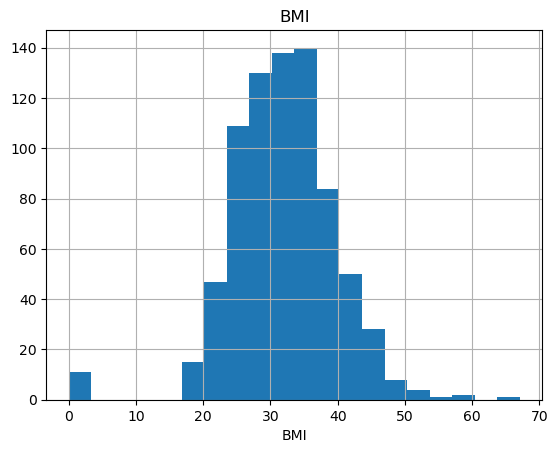

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


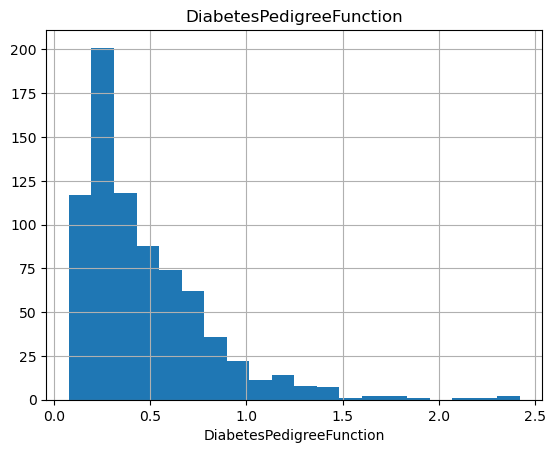

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


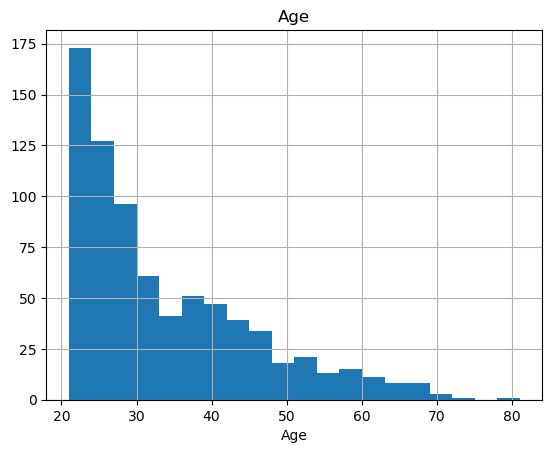

In [8]:
#numerik değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

In [9]:
#adım4: Hedef değişken= outcome (1 /0)
#kategorik değişkenlere göre outcome ortalaması
def outcome_with_cat(dataframe, Outcome, cat_col):
    print(dataframe.groupby(cat_col).agg({Outcome: "mean"}))

for col in cat_cols:
    outcome_with_cat(df, "Outcome", col)

         Outcome
Outcome         
0          0.000
1          1.000


In [10]:
df.groupby("Outcome").agg({"Age":"mean","Glucose":"mean","BMI":"mean"})

,Age,Glucose,BMI
Outcome,,,
0,31.190,109.980,30.304
1,37.067,141.257,35.143


In [11]:
#outcome göre numerik değişkenlerin ortalaması
def outcome_with_num(dataframe, outcome, num_col):
    print(dataframe.groupby(outcome).agg({num_col: "mean"}))

for col in num_cols:
    outcome_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0              3.298
1              4.866
         Glucose
Outcome         
0        109.980
1        141.257
         BloodPressure
Outcome               
0               68.184
1               70.825
         SkinThickness
Outcome               
0               19.664
1               22.164
         Insulin
Outcome         
0         68.792
1        100.336
           BMI
Outcome       
0       30.304
1       35.143
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
           Age
Outcome       
0       31.190
1       37.067


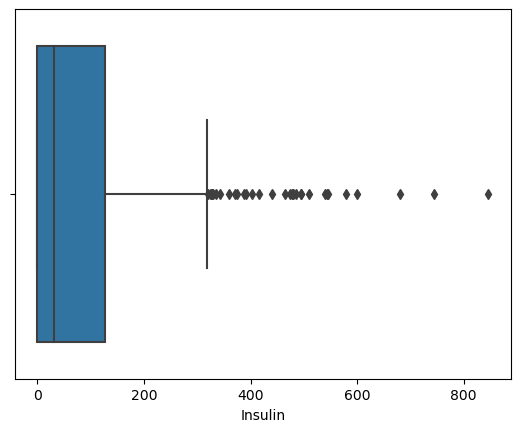

In [12]:
#Adım 5: aykırı gözlem analizi
sns.boxplot(x=df["Insulin"])
plt.show()


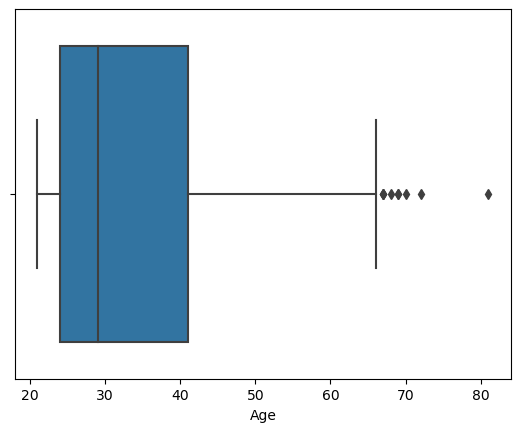

In [13]:
sns.boxplot(x=df["Age"])
plt.show()

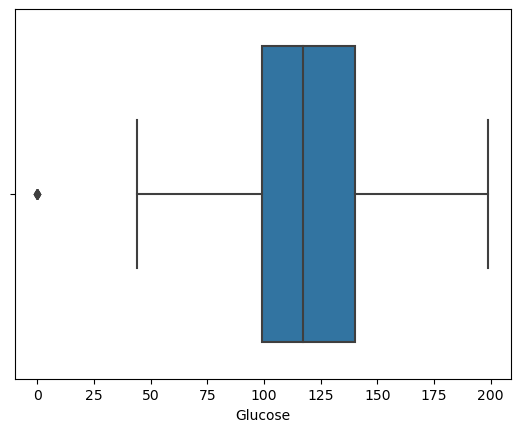

In [14]:
sns.boxplot(x=df["Glucose"])
plt.show()

In [15]:
q1 = df["Insulin"].quantile(0.25)  
q1

0.0

In [16]:
q3 = df["Insulin"].quantile(0.75) 
q3

127.25

In [17]:
def outlier_thresholds(dataframe,col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile( q1 )
  quartile3 = dataframe[col_name].quantile( q3 )
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit


In [18]:
outlier_thresholds(df, "Insulin")


(-190.875, 318.125)

In [19]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True  #aykırı değer varsa true döner.
    else:
        return False 
    

check_outlier(df, "Insulin")


True

In [20]:
check_outlier(df, "Glucose")

True

In [21]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [22]:
for col in cat_cols:
    print(col, check_outlier(df, col))

Outcome False


In [23]:
#aykırı değerlerin kednilerine erişmek

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

grab_outliers(df, "Insulin")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
8              2      197             70             45      543 30.500                     0.158   53        1
13             1      189             60             23      846 30.100                     0.398   59        1
54             7      150             66             42      342 34.700                     0.718   42        0
111            8      155             62             26      495 34.000                     0.543   46        1
139            5      105             72             29      325 36.900                     0.159   28        0


In [26]:
insulin_index = grab_outliers(df, "Insulin", True)
insulin_index


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
8              2      197             70             45      543 30.500                     0.158   53        1
13             1      189             60             23      846 30.100                     0.398   59        1
54             7      150             66             42      342 34.700                     0.718   42        0
111            8      155             62             26      495 34.000                     0.543   46        1
139            5      105             72             29      325 36.900                     0.159   28        0


Int64Index([8, 13, 54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258, 286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584, 612, 645, 655, 695, 707, 710, 715, 753], dtype='int64')

In [27]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000,148.000,72,35,0.000,33.600,0.627,50.000,1
1,1.000,85.000,66,29,0.000,26.600,0.351,31.000,0
2,8.000,183.000,64,0,0.000,23.300,0.672,32.000,1
3,1.000,89.000,66,23,94.000,28.100,0.167,21.000,0
4,0.000,137.000,40,35,168.000,43.100,1.200,33.000,1
5,5.000,116.000,74,0,0.000,25.600,0.201,30.000,0
6,3.000,78.000,50,32,88.000,31.000,0.248,26.000,1
7,10.000,115.000,35,0,0.000,35.300,0.134,29.000,0
8,2.000,197.000,70,45,318.125,30.500,0.158,53.000,1
9,8.000,125.000,96,0,0.000,13.350,0.232,54.000,1


In [28]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


In [29]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T


,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
Pregnancies,768.000,3.837,3.344,0.000,0.000,0.000,3.000,6.000,9.000,13.000,13.500
Glucose,768.000,121.136,31.187,37.125,57.000,79.000,117.000,140.250,167.000,196.000,199.000
BloodPressure,768.000,70.685,14.197,35.000,35.000,38.700,72.000,80.000,88.000,106.000,107.000
SkinThickness,768.000,20.512,15.845,0.000,0.000,0.000,23.000,32.000,40.000,51.330,80.000
Insulin,768.000,73.653,93.576,0.000,0.000,0.000,30.500,127.250,210.000,318.125,318.125
BMI,768.000,32.125,7.050,13.350,13.350,21.800,32.000,36.600,41.500,50.182,50.550
DiabetesPedigreeFunction,768.000,0.459,0.286,0.078,0.095,0.140,0.372,0.626,0.879,1.200,1.200
Age,768.000,33.200,11.628,21.000,21.000,21.000,29.000,41.000,51.000,66.500,66.500
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


In [30]:
# Missing Values (Eksik Değerler)
df.isnull().values.any()


False

In [31]:
df.notnull().sum()


Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [32]:
#hangi değişkenden kaç tane eksik değer var.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False)


Pregnancies                0.000
Glucose                    0.000
BloodPressure              0.000
SkinThickness              0.000
Insulin                    0.000
BMI                        0.000
DiabetesPedigreeFunction   0.000
Age                        0.000
Outcome                    0.000
dtype: float64

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.837,121.136,70.685,20.512,73.653,32.125,0.459,33.200,0.349
std,3.344,31.187,14.197,15.845,93.576,7.050,0.286,11.628,0.477
min,0.000,37.125,35.000,0.000,0.000,13.350,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,13.500,199.000,107.000,80.000,318.125,50.550,1.200,66.500,1.000


In [35]:
#equal=o // hangi değişkende kaç tane 0 var.
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [36]:
na_cols = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
na_cols

['SkinThickness', 'Insulin']

In [37]:
for col in na_cols:
    df[col] = df[col].replace(0,np.NaN)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000,148.000,72,35.000,NaN,33.600,0.627,50.000,1
1,1.000,85.000,66,29.000,NaN,26.600,0.351,31.000,0
2,8.000,183.000,64,NaN,NaN,23.300,0.672,32.000,1
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1
5,5.000,116.000,74,NaN,NaN,25.600,0.201,30.000,0
6,3.000,78.000,50,32.000,88.000,31.000,0.248,26.000,1
7,10.000,115.000,35,NaN,NaN,35.300,0.134,29.000,0
8,2.000,197.000,70,45.000,318.125,30.500,0.158,53.000,1
9,8.000,125.000,96,NaN,NaN,13.350,0.232,54.000,1


In [38]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    #eksik değer sayısına göre sırala;
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    #eksik değer oranı için;
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    #axis=1 ,sütunlara göre birleştirme işlemi yapmak istiyorum.
    #np.round(..) virgülden sonraki basamakla ilgili bir ayarlama
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560


In [39]:
df.fillna(df.mean(), inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000,148.000,72,35.000,143.567,33.600,0.627,50.000,1
1,1.000,85.000,66,29.000,143.567,26.600,0.351,31.000,0
2,8.000,183.000,64,29.118,143.567,23.300,0.672,32.000,1
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1
5,5.000,116.000,74,29.118,143.567,25.600,0.201,30.000,0
6,3.000,78.000,50,32.000,88.000,31.000,0.248,26.000,1
7,10.000,115.000,35,29.118,143.567,35.300,0.134,29.000,0
8,2.000,197.000,70,45.000,318.125,30.500,0.158,53.000,1
9,8.000,125.000,96,29.118,143.567,13.350,0.232,54.000,1


In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [42]:
#Adım 7: Korelasyon Analizi:
df.corr


<bound method DataFrame.corr of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction    Age  Outcome
0          6.000  148.000             72         35.000  143.567 33.600                     0.627 50.000        1
1          1.000   85.000             66         29.000  143.567 26.600                     0.351 31.000        0
2          8.000  183.000             64         29.118  143.567 23.300                     0.672 32.000        1
3          1.000   89.000             66         23.000   94.000 28.100                     0.167 21.000        0
4          0.000  137.000             40         35.000  168.000 43.100                     1.200 33.000        1
5          5.000  116.000             74         29.118  143.567 25.600                     0.201 30.000        0
6          3.000   78.000             50         32.000   88.000 31.000                     0.248 26.000        1
7         10.000  115.000             35         29.118 

<AxesSubplot:>

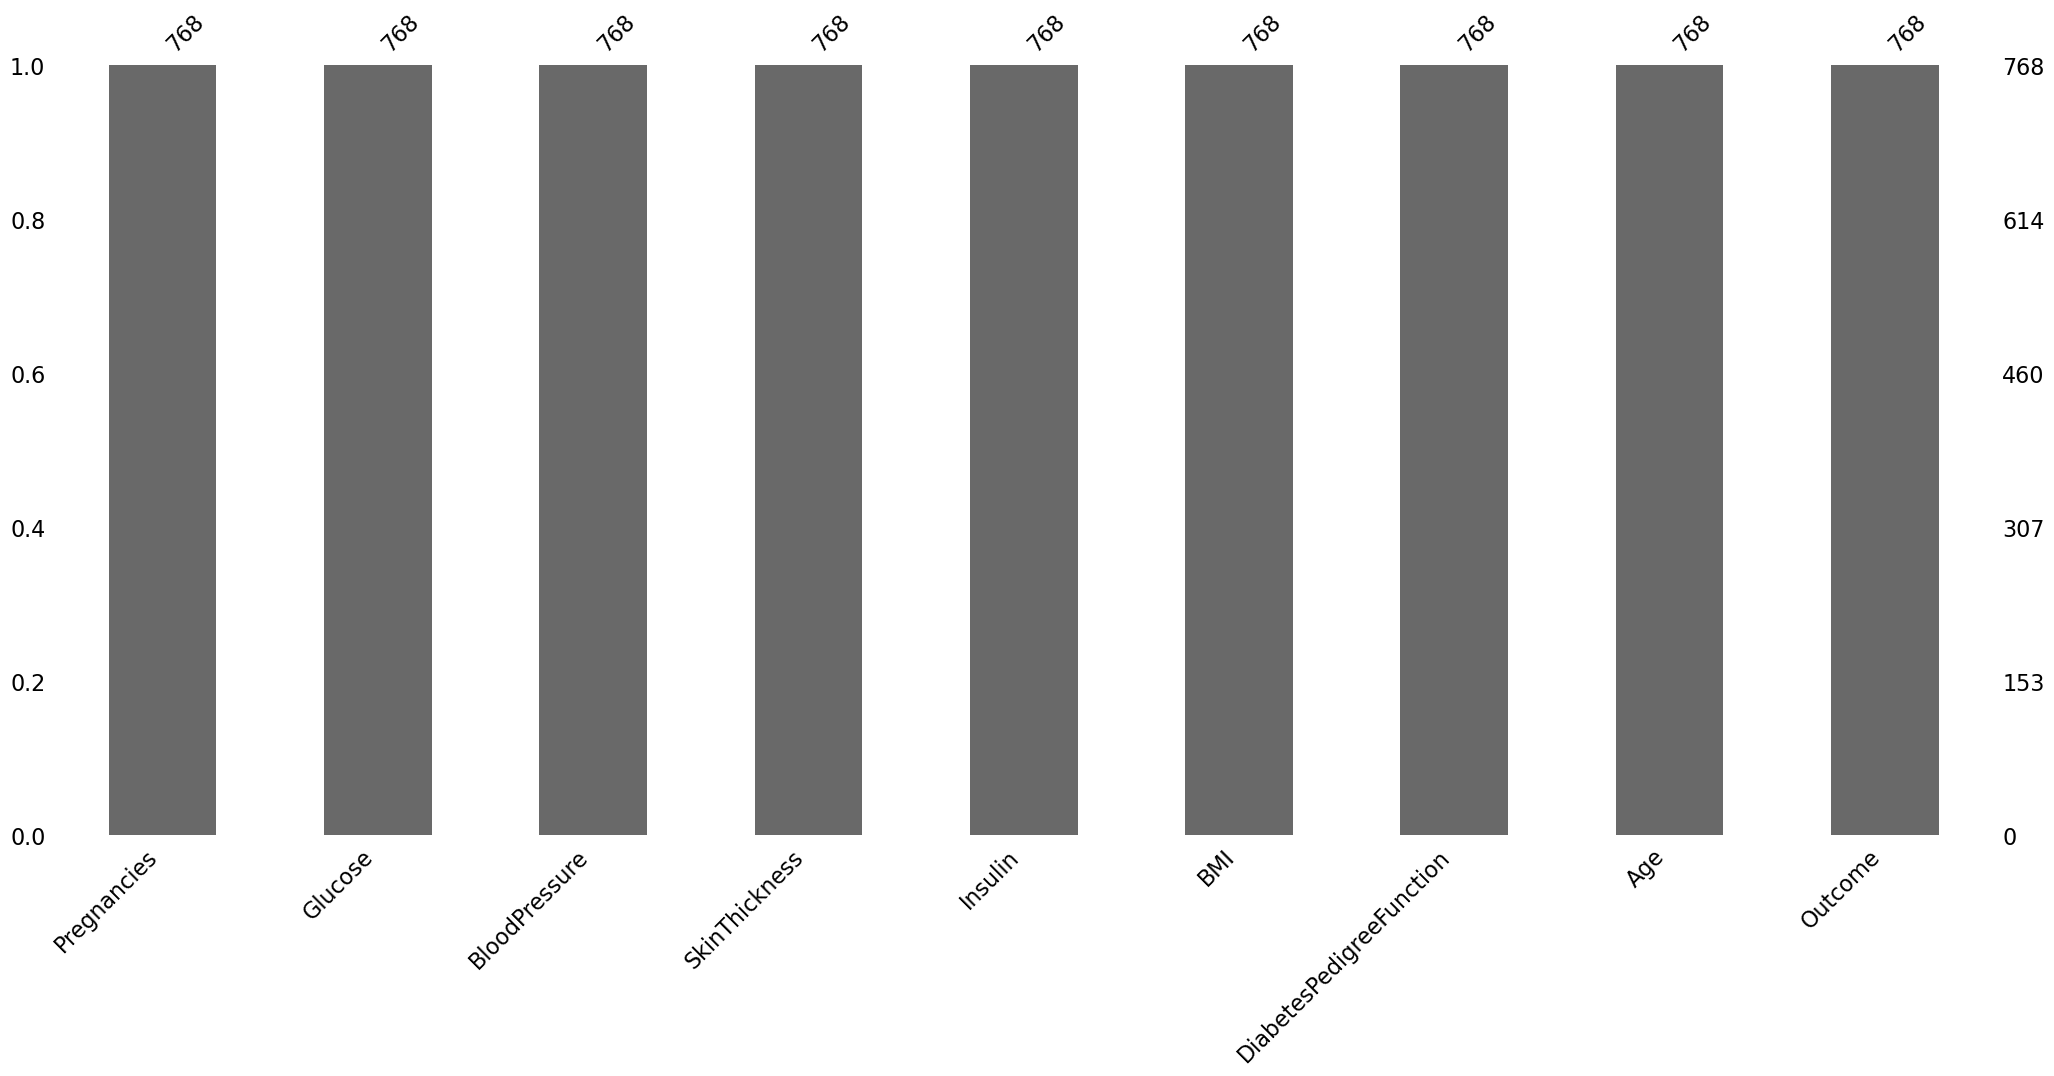

In [43]:
#eksik verilerin yüzdesi için
msno.bar(df)

<AxesSubplot:>

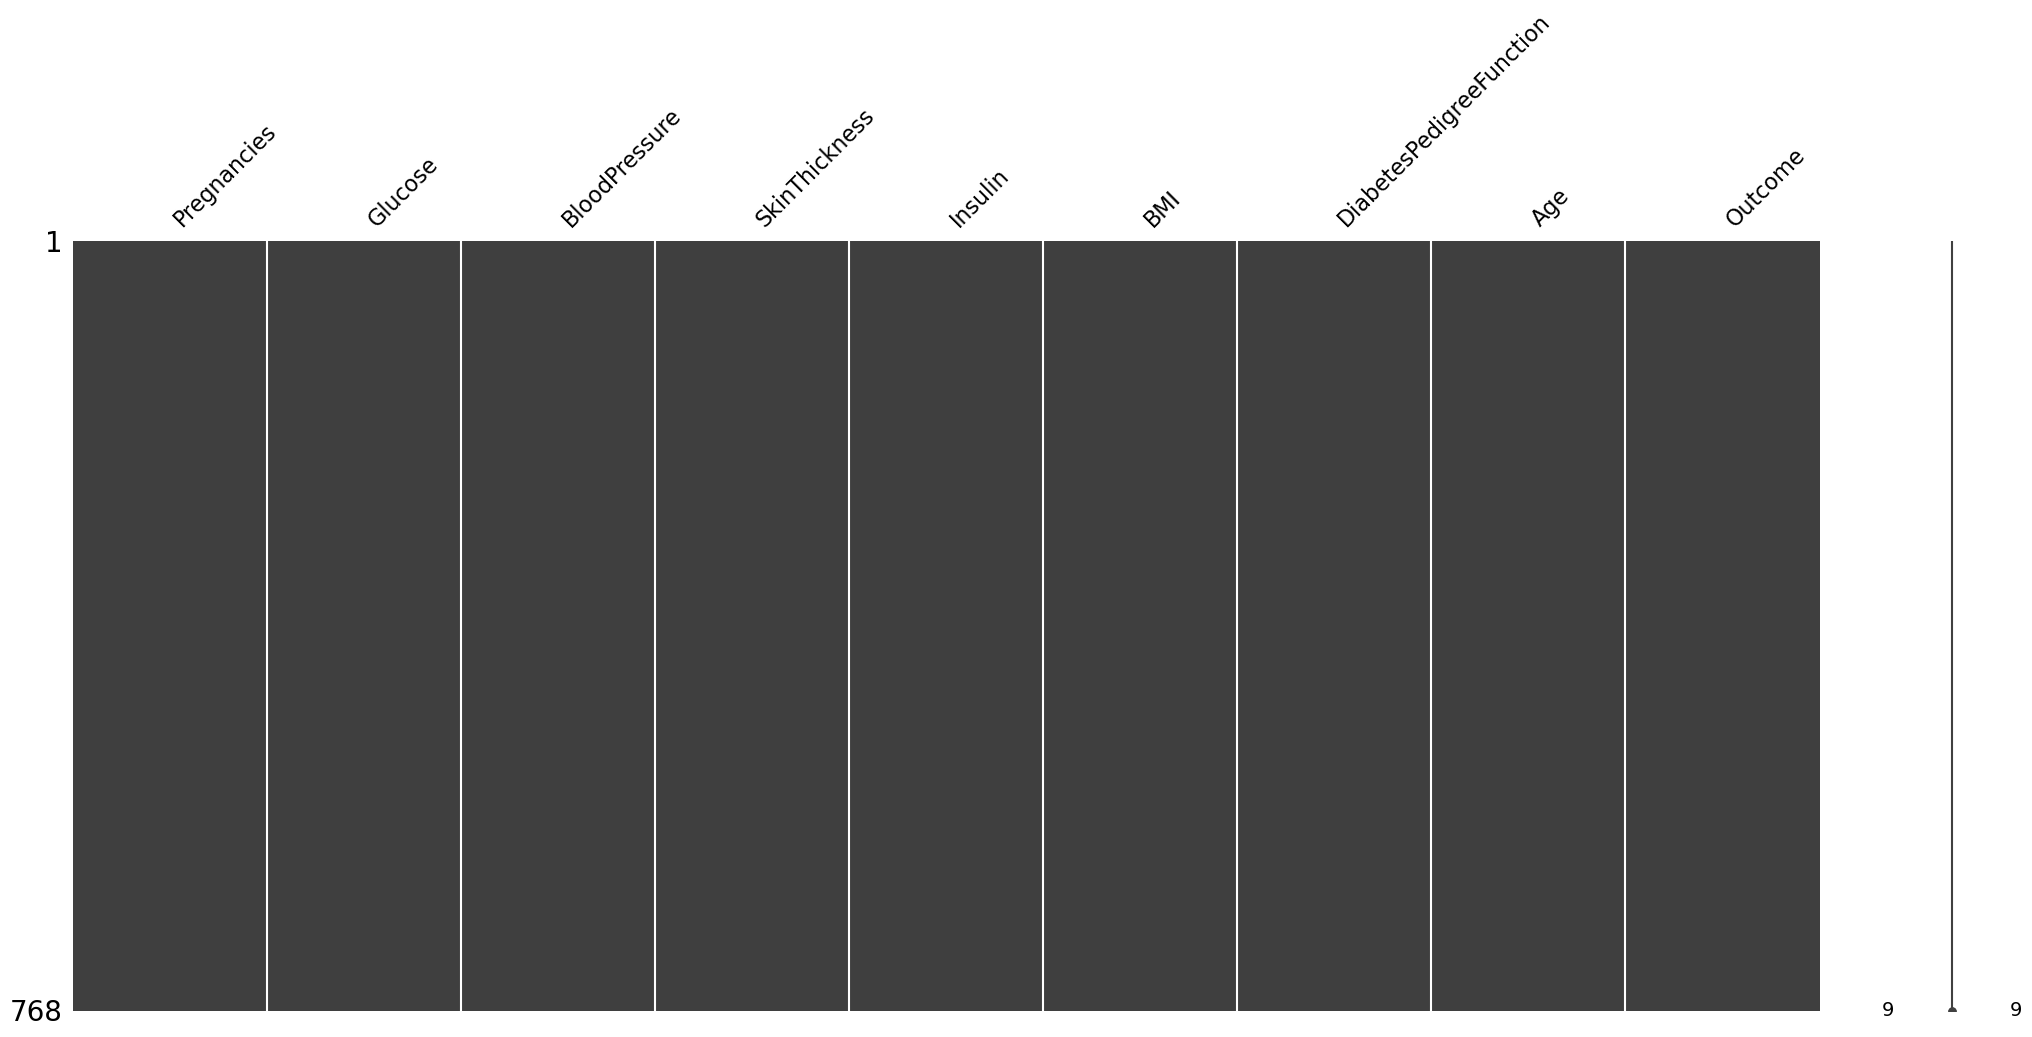

In [44]:
#eksik verileri matris biçiminde görselleştirmek için
msno.matrix(df)


<AxesSubplot:>

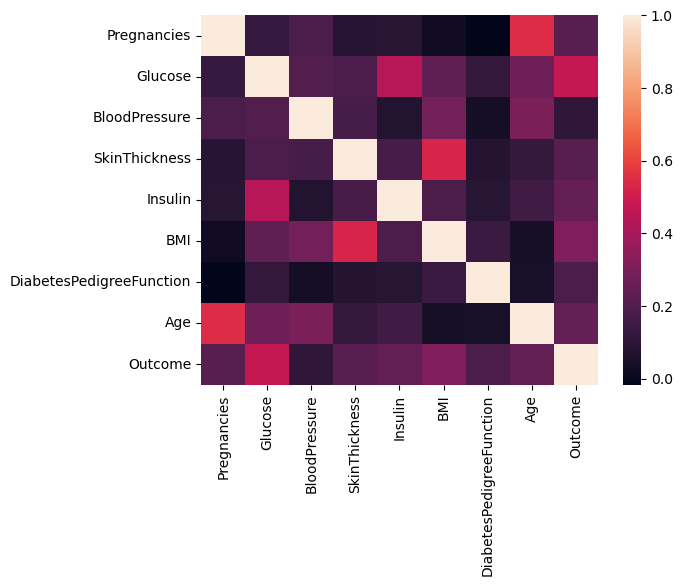

In [45]:
sns.heatmap(df.corr())

In [46]:
#Özellik İndirgeme --> özellikler arasında seçim yap. ben en yüksek korelasyona sahip 3 tanesini istiyorum.
#Outcome en yüksek etki edenler.
df.corr().nlargest(3,"Outcome")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.220,0.479,0.113,0.216,0.243,0.310,0.185,0.243,1.000
Glucose,0.129,1.000,0.198,0.184,0.443,0.236,0.120,0.269,0.479
BMI,0.025,0.236,0.283,0.528,0.189,1.000,0.141,0.043,0.310


In [47]:
#,histogramın çizileceği verileri belirtir. 
#İkinci argüman, histogramdaki çubukların sayısını belirtir.
#Üçüncü argüman, histogramdaki çubukların saydamlığını belirtir. 
#Dördüncü argüman olan "label", histogramın etiketini belirler.
#"Outcome" sütununun değeri 1 olan verilerin belirli bir sütundaki dağılımını

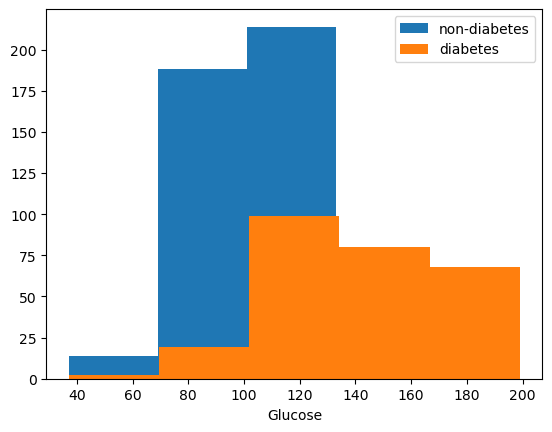

In [48]:
col = 'Glucose'
#"Outcome" sütununun değeri 0 olan verilerin dağılımı
plt.hist(df[df['Outcome']==0][col], 5, alpha=1, label='non-diabetes')
#"Outcome" sütununun değeri 1 olan verilerin belirli bir sütundaki dağılımı
plt.hist(df[df['Outcome']==1][col], 5, alpha=1, label='diabetes')

plt.xlabel(col)
#grafikteki öğelerin etiketlerini gösteren bir açıklama kutusu gösterir.
plt.legend(loc='upper right')



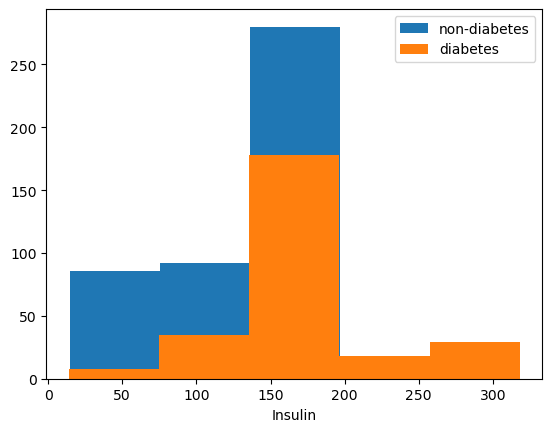

In [49]:
#DİYABET olanlar ve olmayanlar için histogram dağılımları
col = 'Insulin'
#"Outcome" sütununun değeri 0 olan verilerin dağılımı
plt.hist(df[df['Outcome']==0][col], 5, alpha=1, label='non-diabetes')
#"Outcome" sütununun değeri 1 olan verilerin belirli bir sütundaki dağılımı
plt.hist(df[df['Outcome']==1][col], 5, alpha=1, label='diabetes')

plt.xlabel(col)
#grafikteki öğelerin etiketlerini gösteren bir açıklama kutusu gösterir.
plt.legend(loc='upper right')


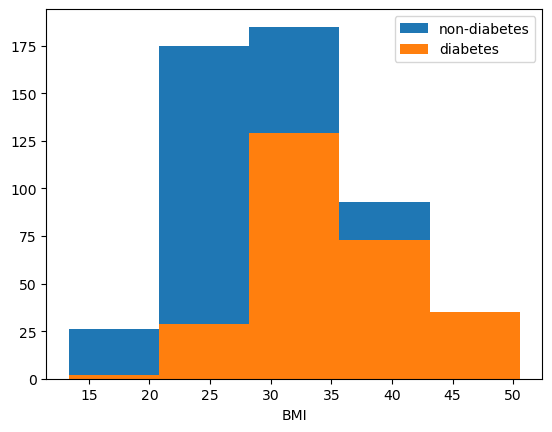

In [51]:
col = 'BMI'
#"Outcome" sütununun değeri 0 olan verilerin dağılımı
plt.hist(df[df['Outcome']==0][col], 5, alpha=1, label='non-diabetes')
#"Outcome" sütununun değeri 1 olan verilerin belirli bir sütundaki dağılımı
plt.hist(df[df['Outcome']==1][col], 5, alpha=1, label='diabetes')

plt.xlabel(col)
#grafikteki öğelerin etiketlerini gösteren bir açıklama kutusu gösterir.
plt.legend(loc='upper right')

# GÖREV2

In [ ]:
#adım1: yukarıda yaptım bunları

In [ ]:
#adım2:Yeni Değişkenler Oluşturma

In [64]:
#[New_Age_Cat] değişkenini oluşturma
df.loc[(df["Age"] >= 21) & (df["Age"] <= 50), "New_Age_Cat"] = "mature"
df.loc[(df["Age"] >= 51), "New_Age_Cat"] = "old"
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Age_Cat
0,6.000,148.000,72,35.000,143.567,33.600,0.627,50.000,1,mature
1,1.000,85.000,66,29.000,143.567,26.600,0.351,31.000,0,mature
2,8.000,183.000,64,29.118,143.567,23.300,0.672,32.000,1,mature
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,mature
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,mature
5,5.000,116.000,74,29.118,143.567,25.600,0.201,30.000,0,mature
6,3.000,78.000,50,32.000,88.000,31.000,0.248,26.000,1,mature
7,10.000,115.000,35,29.118,143.567,35.300,0.134,29.000,0,mature
8,2.000,197.000,70,45.000,318.125,30.500,0.158,53.000,1,old
9,8.000,125.000,96,29.118,143.567,13.350,0.232,54.000,1,old


In [65]:
#[Insulin_Cat] değişkenini oluşturma
df.loc[(df["Insulin"] >= 16) & (df["Insulin"] <= 166), "Insulin_Cat"] = "Normal"
df.loc[(df["Insulin"] < 16) & (df["Insulin"] > 166), "Insulin_Cat"] = "Anormal"
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Age_Cat,Insulin_Cat
0,6.000,148.000,72,35.000,143.567,33.600,0.627,50.000,1,mature,Normal
1,1.000,85.000,66,29.000,143.567,26.600,0.351,31.000,0,mature,Normal
2,8.000,183.000,64,29.118,143.567,23.300,0.672,32.000,1,mature,Normal
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,mature,Normal
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,mature,NaN
5,5.000,116.000,74,29.118,143.567,25.600,0.201,30.000,0,mature,Normal
6,3.000,78.000,50,32.000,88.000,31.000,0.248,26.000,1,mature,Normal
7,10.000,115.000,35,29.118,143.567,35.300,0.134,29.000,0,mature,Normal
8,2.000,197.000,70,45.000,318.125,30.500,0.158,53.000,1,old,NaN
9,8.000,125.000,96,29.118,143.567,13.350,0.232,54.000,1,old,Normal


In [66]:
#[Glucose_Cat] değişkenini oluşturma
df["Glucose_Cat"] = pd.cut(x=df["Glucose"], bins=[0,140,200,300], labels=["Normal", "Prediabetes", "Diabetes"])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Age_Cat,Insulin_Cat,Glucose_Cat
0,6.000,148.000,72,35.000,143.567,33.600,0.627,50.000,1,mature,Normal,Prediabetes
1,1.000,85.000,66,29.000,143.567,26.600,0.351,31.000,0,mature,Normal,Normal
2,8.000,183.000,64,29.118,143.567,23.300,0.672,32.000,1,mature,Normal,Prediabetes
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,mature,Normal,Normal
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,mature,NaN,Normal
5,5.000,116.000,74,29.118,143.567,25.600,0.201,30.000,0,mature,Normal,Normal
6,3.000,78.000,50,32.000,88.000,31.000,0.248,26.000,1,mature,Normal,Normal
7,10.000,115.000,35,29.118,143.567,35.300,0.134,29.000,0,mature,Normal,Normal
8,2.000,197.000,70,45.000,318.125,30.500,0.158,53.000,1,old,NaN,Prediabetes
9,8.000,125.000,96,29.118,143.567,13.350,0.232,54.000,1,old,Normal,Normal


In [67]:
#BMI_Cat değişkenini oluşturma
df["BMI_Cat"] = pd.cut( x = df["BMI"], bins = [0.0, 18.5, 24.9, 24.9, 29.99, 100], 
                      labels = ["Underweight", "Healthy", "Overweight", "Obese"], 
                      duplicates='drop')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Age_Cat,Insulin_Cat,Glucose_Cat,BMI_Cat
0,6.000,148.000,72,35.000,143.567,33.600,0.627,50.000,1,mature,Normal,Prediabetes,Obese
1,1.000,85.000,66,29.000,143.567,26.600,0.351,31.000,0,mature,Normal,Normal,Overweight
2,8.000,183.000,64,29.118,143.567,23.300,0.672,32.000,1,mature,Normal,Prediabetes,Healthy
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,mature,Normal,Normal,Overweight
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,mature,NaN,Normal,Obese
5,5.000,116.000,74,29.118,143.567,25.600,0.201,30.000,0,mature,Normal,Normal,Overweight
6,3.000,78.000,50,32.000,88.000,31.000,0.248,26.000,1,mature,Normal,Normal,Obese
7,10.000,115.000,35,29.118,143.567,35.300,0.134,29.000,0,mature,Normal,Normal,Obese
8,2.000,197.000,70,45.000,318.125,30.500,0.158,53.000,1,old,NaN,Prediabetes,Obese
9,8.000,125.000,96,29.118,143.567,13.350,0.232,54.000,1,old,Normal,Normal,Underweight


In [68]:
cat_cols, num_cols, cat_but_car = grab_col_names(df) 

Observations: 768
Variables: 13
cat_cols: 5
num_cols: 8
cat_but_car: 0
num_but_cat: 3


In [71]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


In [72]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(df, col)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Age_Cat,Insulin_Cat,Glucose_Cat,BMI_Cat
0,6.000,148.000,72,35.000,143.567,33.600,0.627,50.000,1,0,Normal,1,Obese
1,1.000,85.000,66,29.000,143.567,26.600,0.351,31.000,0,0,Normal,0,Overweight
2,8.000,183.000,64,29.118,143.567,23.300,0.672,32.000,1,0,Normal,1,Healthy
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,0,Normal,0,Overweight
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,0,NaN,0,Obese


In [73]:
#OneHot Encoding
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in "Outcome"]
cat_cols

['New_Age_Cat', 'Insulin_Cat', 'Glucose_Cat', 'BMI_Cat']

In [75]:
def one_hot_encoder(dataframe, cat_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

In [76]:
#ohe işlemine uygulanacak değişkenleri seçmek için şart koyuyorum.
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
one_hot_encoder(df, ohe_cols).head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Age_Cat,Insulin_Cat,Glucose_Cat,BMI_Cat_Healthy,BMI_Cat_Overweight,BMI_Cat_Obese
0,6.000,148.000,72,35.000,143.567,33.600,0.627,50.000,1,0,Normal,1,0,0,1
1,1.000,85.000,66,29.000,143.567,26.600,0.351,31.000,0,0,Normal,0,0,1,0
2,8.000,183.000,64,29.118,143.567,23.300,0.672,32.000,1,0,Normal,1,1,0,0
3,1.000,89.000,66,23.000,94.000,28.100,0.167,21.000,0,0,Normal,0,0,1,0
4,0.000,137.000,40,35.000,168.000,43.100,1.200,33.000,1,0,NaN,0,0,0,1


In [77]:
#Adım4 : Numerik Kolonlar için standartlaştırma işlemi yapalım
#Robust Scaler: aykırı değerlere karşı daha dayanıklıdır,etkilenmez.
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,0.167,0.669,-0.600,-0.400,0.000,0.600,2.100
Glucose,768.000,0.100,0.756,-1.936,-0.436,0.000,0.564,1.988
BloodPressure,768.000,-0.073,0.789,-2.056,-0.556,0.000,0.444,1.944
SkinThickness,768.000,-0.000,1.231,-3.160,-0.588,0.000,0.412,7.269
Insulin,768.000,0.000,2.719,-5.872,-1.000,0.000,0.000,7.911
BMI,768.000,0.013,0.758,-2.005,-0.505,0.000,0.495,1.995
DiabetesPedigreeFunction,768.000,0.226,0.747,-0.770,-0.337,0.000,0.663,2.163
Age,768.000,0.247,0.684,-0.471,-0.294,0.000,0.706,2.206
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000
New_Age_Cat,768.000,0.105,0.307,0.000,0.000,0.000,0.000,1.000


In [6]:
#Adım5: Modelleme
from sklearn.ensemble import RandomForestClassifier

y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

NameError: name 'df' is not defined